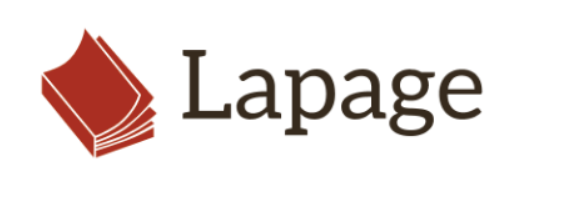

# Préparation des données

<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies-et-des-données" data-toc-modified-id="Importation-des-librairies-et-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies et des données</a></span></li><li><span><a href="#Analyse-des-données" data-toc-modified-id="Analyse-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse des données</a></span><ul class="toc-item"><li><span><a href="#Customers" data-toc-modified-id="Customers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Customers</a></span></li><li><span><a href="#Products" data-toc-modified-id="Products-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Products</a></span></li><li><span><a href="#Transactions" data-toc-modified-id="Transactions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transactions</a></span></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Customers" data-toc-modified-id="Customers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Customers</a></span></li><li><span><a href="#Products" data-toc-modified-id="Products-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Products</a></span></li><li><span><a href="#Transactions" data-toc-modified-id="Transactions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Transactions</a></span></li></ul></li><li><span><a href="#Rapprochement-des-exports" data-toc-modified-id="Rapprochement-des-exports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rapprochement des exports</a></span><ul class="toc-item"><li><span><a href="#Jointure-intermédiaire" data-toc-modified-id="Jointure-intermédiaire-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Jointure intermédiaire</a></span></li><li><span><a href="#Jointure-finale" data-toc-modified-id="Jointure-finale-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Jointure finale</a></span></li></ul></li></ul></div>

## Importation des librairies et des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
#Chargement des différentes librairies

%run functions.py
#Chargement de mes fonctions perso

Input_customers = pd.read_csv('Data/customers.csv')
Input_products = pd.read_csv('Data/products.csv')
Input_transactions = pd.read_csv('Data/transactions.csv')
#Importation des différents dataset

customers = Input_customers.copy()
products = Input_products.copy()
transactions = Input_transactions.copy()
#Création des output

**Version des librairies utilisées:**

- numpy 1.20.3
- pandas 1.3.4
- matplotlib 3.4.3
- seaborn 0.11.2
- scipy 1.7.1

## Analyse des données

### Customers

In [2]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
customers.info()
#Informations sur le df
customers.describe()
#Détection des outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [4]:
customers[customers.duplicated(keep=False)]
#Détection des doublons

,client_id,sex,birth


**Conclusion suite à l'analyse:**

- Pas de doublons
- Pas de valeurs manquantes
- Les formats des données sont corrects
- Pas de valeurs aberrantes sur les années de naissance
- Rajouter une colonne avec l'âge du client pour répondre à la demande de Julie

### Products

In [5]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
products.info()
#Informations sur le df
products.describe()
#Détection des outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [7]:
products.loc[products["price"] < 0]
#Vérification quant à d'éventuelles valeurs inférieures à 0

,id_prod,price,categ
731,T_0,-1.0,0


In [8]:
products[products.duplicated(keep=False)]
#Détection des doublons

,id_prod,price,categ


**Conclusion suite à l'analyse:**

- Pas de doublons
- Pas de valeurs manquantes
- Les formats des données sont corrects
- Au niveau des valeurs aberrantes, nous avons une ligne avec un prix à -1 → **à investiguer**

### Transactions

In [9]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [10]:
transactions.info()
#Informations sur le df
transactions.describe()
#Détection des outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [11]:
transactions[transactions.duplicated(keep=False)]
#Détection des doublons

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


**Le code 'T_0' dans l'id_prod semble être lié à des tests réalisés.**

In [12]:
valeurs_test = transactions.loc[transactions['id_prod'] == 'T_0']
valeurs_test
#Création d'un df avec les lignes "test"

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


**Conclusion suite à l'analyse:**

- Il semble y avoir des dates en 2023 ??? cf index 4 par exemple
- Pas de valeurs manquantes
- Format des données de la colonne date en object → **à corriger**
- Présence de 200 lignes test 'T_0' en id_prod → **à supprimer**
    - Les codes ct_0 et ct_1 sont donc probablement relatifs aux tests dans la colonne client_id
    - Le code s_0 est probablement relatif aux tests dans la colonne session_id

## Nettoyage des données

### Customers

In [13]:
#Ajout de la colonne "age"

today = datetime.date.today().strftime('%Y')

customers['age'] = int(today) - customers["birth"]
customers

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


**Suite analyse du df "transactions":**

On se rend compte que les identifiants 'ct_0' et 'ct_1' sont probablement relatifs aux tests dans la colonne client_id, nous décidons donc de les supprimer.

In [14]:
customers.loc[(customers['client_id'] =='ct_0') | (customers['client_id'] =='ct_1'),:]

,client_id,sex,birth,age
2735,ct_0,f,2001,22
8494,ct_1,m,2001,22


In [15]:
#Suppression des 2 lignes avec les identifiants tests
customers.drop(customers.loc[(customers['client_id'] =='ct_0') | (customers['client_id'] =='ct_1'),:].index, inplace=True)

### Products

**Suite analyse du df "transactions":**

On se rend compte que l'id 'T_0' est un test, nous décidons donc de supprimer la ligne qui correspond à notre prix à -1

In [16]:
products.drop(products.loc[products["id_prod"] == 'T_0'].index, inplace=True)
#Suppression des lignes tests avec identifiant 'T_0'

### Transactions

In [17]:
#suppresion des 200 lignes tests
transactions.drop(transactions.loc[transactions['id_prod'] == 'T_0'].index, inplace=True)
#conversion de la colonne 'date' au format correct
transactions['date'] = pd.to_datetime(transactions['date'])

Nous vérifions une nouvelle fois la présence de doublons afin de nous assurer que tous les doublons identifiés précedemment étaient bien uniquement liés aux lignes de test:

In [18]:
transactions[transactions.duplicated(keep=False)]
#Nouvelle vérification des doublons

,id_prod,date,session_id,client_id


## Rapprochement des exports

En prévision des différentes jointures à réaliser, nous commençons par vérifier l'unicité des potentielles clés primaires.

In [19]:
test_cle(products, 'id_prod')
test_cle(customers,'client_id')

La clé est unique
La clé est unique


Nous ne testons par le dataframe 'transactions' car un produit peut avoir été vendus plusieurs fois et donc apparaître plusieurs dois dans cet export. Idem, un client peut avoir fait plusieurs transactions et donc son identifiant apparaitre plusieurs fois.

Afin d'être certains de ne perdre aucune donnée lors des jointures, nous réaliserons des jointures externes avec indicateur.

### Jointure intermédiaire

In [20]:
ventes_produits = pd.merge(transactions, products, on ='id_prod', how = 'outer',indicator=True)
ventes_produits

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaT,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaT,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaT,NaN,NaN,23.66,0.0,right_only


In [21]:
#Test de l'état de la jointure
etat_jointure(ventes_produits,"_merge")

_merge
both          679111
left_only        221
right_only        21
dtype: int64

<div class="alert alert-block alert-warning">

<b>Remarque:</b>
    
    
- 679 111 lignes ont fusionnées correctement car présentes dans les 2 df
    
    
- 221 lignes étaient présentes dans l'export des transactions mais n'ont pas d'équivalence dans l'export produits
    - L'id produit 0_2245 est le seul concerné, peut être que ce produit n'est plus commercialisé ou la fiche produit est manquante dans la base ?

- 21 lignes étaient présentes dans l'export produits mais n'apparaissent pas dans la liste des transactions
    - Il est probable que ces produits n'aient jamais été vendus

    
</div>

In [22]:
ventes_produits.loc[ventes_produits['_merge'] == 'left_only']
#Liste des transactions sans équivalence dans l'export products (fiche produit 0_2245)

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


In [23]:
no_sales = ventes_produits.loc[ventes_produits['_merge'] == 'right_only']
no_sales
#Liste des produits présents dans l'export products probablement jamais vendus / à remonter au service concerné

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaT,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaT,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaT,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaT,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaT,NaN,NaN,2.99,0.0,right_only


En prévision des différentes analyses à venir, nous décidons de supprimer:

- 221 lignes dans la liste des transactions sans équivalence dans l'export products (fiche produit 0_2245)
- 21 lignes présentes dans l'export products mais sans équivalence dans les transactions. Nous remonterons ces informations au service concerné afin de faire le point sur ces produits.

In [24]:
ventes_produits.drop(ventes_produits.loc[ventes_produits['_merge'] == 'left_only'].index, inplace=True)
#Suppression des 221 lignes
ventes_produits.drop(ventes_produits.loc[ventes_produits['_merge'] == 'right_only'].index, inplace=True)
#Suppression des 21 lignes

### Jointure finale

In [25]:
ventes_final = pd.merge(ventes_produits, customers, on ='client_id', how = 'outer',indicator='test')
ventes_final

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,age,test
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,37,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,37,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,37,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,37,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,37,both
...,...,...,...,...,...,...,...,...,...,...,...
679127,NaN,NaT,NaN,c_862,NaN,NaN,NaN,f,1956,67,right_only
679128,NaN,NaT,NaN,c_7584,NaN,NaN,NaN,f,1960,63,right_only
679129,NaN,NaT,NaN,c_90,NaN,NaN,NaN,m,2001,22,right_only
679130,NaN,NaT,NaN,c_587,NaN,NaN,NaN,m,1993,30,right_only


In [26]:
etat_jointure(ventes_final,'test')

test
both          679111
right_only        21
left_only          0
dtype: int64

<div class="alert alert-block alert-warning">

<b>Remarque:</b>
    
    
- 679 332 lignes ont fusionnées correctement car présentes dans les 2 df
    

- 21 lignes étaient présentes dans l'export clients mais n'apparaissent pas dans la liste des transactions
    - Ce sont probablement des clients qui n'ont pas réalisés d'achats sur la période

    
</div>

In [27]:
no_sales_customers = ventes_final.loc[ventes_final['test'] == 'right_only']
no_sales_customers
#Liste des clients n'ayant pas réalisé d'achats / à remonter au service concerné

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,age,test
679111,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,f,2001,22,right_only
679112,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,f,1997,26,right_only
679113,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,f,1998,25,right_only
679114,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,f,1967,56,right_only
679115,NaN,NaT,NaN,c_3443,NaN,NaN,NaN,m,1959,64,right_only
679116,NaN,NaT,NaN,c_4447,NaN,NaN,NaN,m,1956,67,right_only
679117,NaN,NaT,NaN,c_3017,NaN,NaN,NaN,f,1992,31,right_only
679118,NaN,NaT,NaN,c_4086,NaN,NaN,NaN,f,1992,31,right_only
679119,NaN,NaT,NaN,c_6930,NaN,NaN,NaN,m,2004,19,right_only
679120,NaN,NaT,NaN,c_4358,NaN,NaN,NaN,m,1999,24,right_only


Nous décidons de supprimer ces 21 lignes qui ne nous permettront pas de réaliser des analyses futures sur les ventes.
Cette liste des clients est à remonter au service marketing afin de mettre en place des actions pour relancer ces clients et les fidéliser.

In [28]:
ventes_final.drop(ventes_final.loc[ventes_final['test'] == 'right_only'].index, inplace=True)
#Suppression des 21 lignes

In [29]:
ventes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   _merge      679111 non-null  category      
 7   sex         679111 non-null  object        
 8   birth       679111 non-null  int64         
 9   age         679111 non-null  int64         
 10  test        679111 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 53.1+ MB


In [30]:
ventes_final['categ'] = ventes_final['categ'].astype("int")
#Conversion de categ en int

ventes_final.drop(columns=["_merge", "test"],inplace=True)
#Suppression des indicateurs de jointure pour une meilleure lisibilité du df

In [31]:
ventes_final
#affichage du df final

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2,m,1992,31
